<a href="https://colab.research.google.com/github/agnessia23/Portofolio/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CASE STUDY**
**Regression and Inferential Analysis**

**TASK**

Buatlah analisis regresi linear dengan data dibawah ini, Tentukan variabel mana yang paling berpengaruh terhadap jumlah kecelakaan

Y = Jumlah Kecelakaan Lalu Lintas (kasus)

B1 = Faktor Pengemudi (orang)

B2 = Faktor Jalan (kasus)

B3 = Faktor Kendaraan (kasus)

B4 = Pertumbuhan jumlah kendaraan bermotor (unit)

**Step 1**
Import semua package gg dibutuhkan



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression


**Step 2** : Memasukkan Data

In [ ]:
data = pd.read_csv('Regresi.csv', engine = 'python', encoding = 'ISO-8859-1')
data.head()

,ï»¿Jumlah Kecelakaan Lalu Lintas (kasus),Faktor Pengemudi (orang),Faktor Jalan (kasus),Faktor Kendaraan (kasus),Pertumbuhan jumlah kendaraan bermotor (unit)
0,107,56,31,12,873
1,113,63,23,15,402
2,117,60,27,14,538
3,129,61,33,9,432
4,137,77,31,18,746


**Data Analysis**

In [ ]:
#Describe Data
data.describe()

,ï»¿Jumlah Kecelakaan Lalu Lintas (kasus),Faktor Pengemudi (orang),Faktor Jalan (kasus),Faktor Kendaraan (kasus),Pertumbuhan jumlah kendaraan bermotor (unit)
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,114.500000,60.250000,26.666667,13.083333,642.750000
std,11.587611,6.210329,5.382351,3.629634,198.474695
min,99.000000,54.000000,17.000000,9.000000,393.000000
25%,106.000000,56.000000,22.250000,10.750000,477.750000
50%,113.500000,59.500000,28.000000,12.500000,642.000000
75%,119.250000,61.500000,31.000000,14.250000,817.000000
max,137.000000,77.000000,33.000000,21.000000,904.000000


Dari sini dapat dilihat rata rata kasus yang terjadi sebanyak 114, kemudian kecelakan terjadi berkisar antara  99 sampai dengan 137

<ipython-input-14-177179eb5960>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ï»¿Jumlah Kecelakaan Lalu Lintas (kasus)'])


<function matplotlib.pyplot.show(close=None, block=None)>

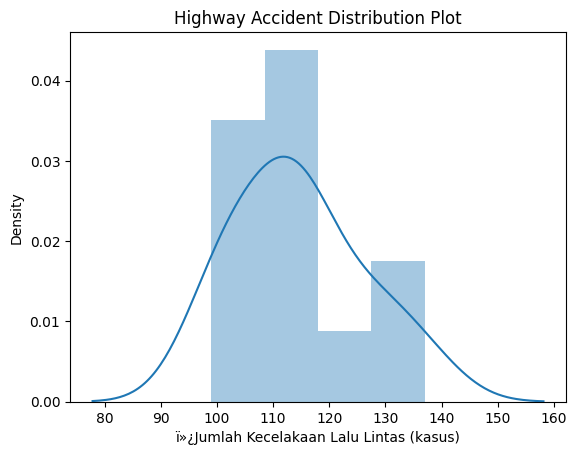

In [ ]:
#Data Distribution
plt.title('Highway Accident Distribution Plot')
sns.distplot(data['ï»¿Jumlah Kecelakaan Lalu Lintas (kasus)'])
plt.show

Distrubusi Plot menunjukkan variasi sebaran data. Ini mewakili data dengan menggabungkan garis dengan historgram. dari sini dapat kita lihat kembali bahwa yang paling kecil adalah 99 dan yang paling tingi yaitu 134


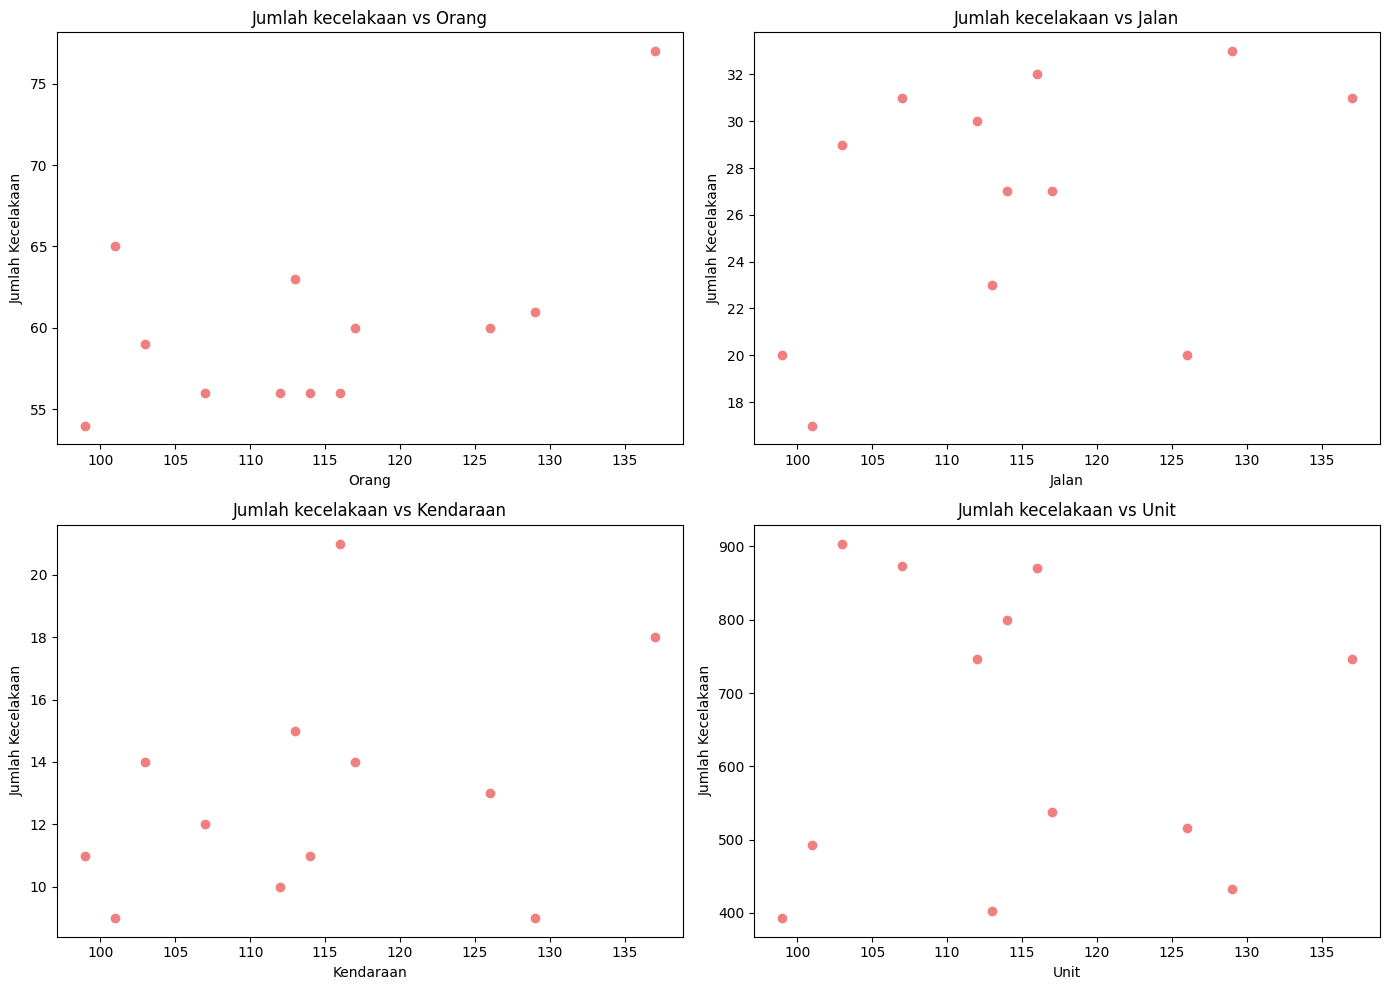

In [ ]:
plt.figure(figsize=(14, 10))

# Plot 1: Jumlah kecelakaan vs Orang
plt.subplot(2, 2, 1)
plt.scatter(data['ï»¿Jumlah Kecelakaan Lalu Lintas (kasus)'], data['Faktor Pengemudi (orang)'], color='lightcoral')
plt.title('Jumlah kecelakaan vs Orang')
plt.xlabel('Orang')
plt.ylabel('Jumlah Kecelakaan')
plt.box(True)

# Plot 2: Jumlah kecelakaan vs Jalan
plt.subplot(2, 2, 2)
plt.scatter(data['ï»¿Jumlah Kecelakaan Lalu Lintas (kasus)'], data['Faktor Jalan (kasus)'], color='lightcoral')
plt.title('Jumlah kecelakaan vs Jalan')
plt.xlabel('Jalan')
plt.ylabel('Jumlah Kecelakaan')
plt.box(True)

# Plot 3: Jumlah kecelakaan vs Kendaraan
plt.subplot(2, 2, 3)
plt.scatter(data['ï»¿Jumlah Kecelakaan Lalu Lintas (kasus)'], data['Faktor Kendaraan (kasus)'], color='lightcoral')
plt.title('Jumlah kecelakaan vs Kendaraan')
plt.xlabel('Kendaraan')
plt.ylabel('Jumlah Kecelakaan')
plt.box(True)

# Plot 4: Jumlah kecelakaan vs Unit
plt.subplot(2, 22, 4)
plt.scatter(data['ï»¿Jumlah Kecelakaan Lalu Lintas (kasus)'], data['Pertumbuhan jumlah kendaraan bermotor (unit)'], color='lightcoral')
plt.title('Jumlah kecelakaan vs Unit')
plt.xlabel('Unit')
plt.ylabel('Jumlah Kecelakaan')
plt.box(True)

plt.tight_layout()
plt.show()

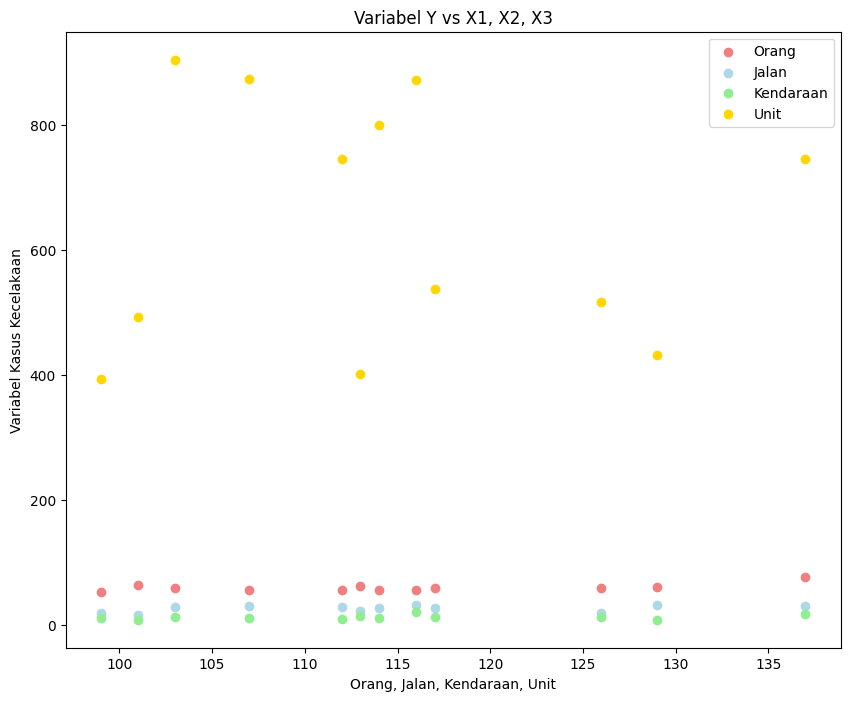

In [ ]:
plt.figure(figsize=(10, 8))

# Plot semua hubungan dalam satu gambar
plt.scatter(data['ï»¿Jumlah Kecelakaan Lalu Lintas (kasus)'], data['Faktor Pengemudi (orang)'], color='lightcoral', label='Orang')
plt.scatter(data['ï»¿Jumlah Kecelakaan Lalu Lintas (kasus)'], data['Faktor Jalan (kasus)'], color='lightblue', label='Jalan')
plt.scatter(data['ï»¿Jumlah Kecelakaan Lalu Lintas (kasus)'], data['Faktor Kendaraan (kasus)'], color='lightgreen', label='Kendaraan')
plt.scatter(data['ï»¿Jumlah Kecelakaan Lalu Lintas (kasus)'], data['Pertumbuhan jumlah kendaraan bermotor (unit)'], color='gold', label='Unit')

plt.title('Variabel Y vs X1, X2, X3')
plt.xlabel('Orang, Jalan, Kendaraan, Unit')
plt.ylabel('Variabel Kasus Kecelakaan')
plt.legend()  # Untuk menampilkan label variabel
plt.box(True)
plt.show()

**Membagi data set menjadi dependent dan independent Variabel**

In [ ]:
# Dependent variable (y) - kolom pertama
y = data.iloc[:, 0]

# Independent variables (X) - kolom kedua hingga keempat
x = data.iloc[:, 1:5]

**Membuat Model**

In [ ]:
Regressor = LinearRegression()
Regressor.fit(x,y)

LinearRegression()

In [ ]:
# Get the coefficient and the intercept
coefficients = Regressor.coef_
intercept = Regressor.intercept_

print(coefficients)
print(intercept)

[ 0.90844505  1.34394216  0.50142411 -0.02459449]
33.17553598356555


In [ ]:
# Compose Column Names
feature_names = x.columns

# Printing the Regression Equation
equation = "y = {:.2f}".format(intercept)
for coef, feature in zip(coefficients, feature_names):
    equation += " + ({:.2f} * {})".format(coef, feature)

print("Regression Equation:")
print(equation)

Regression Equation:
y = 33.18 + (0.91 * Faktor Pengemudi (orang)) + (1.34 * Faktor Jalan (kasus)) + (0.50 * Faktor Kendaraan (kasus)) + (-0.02 * Pertumbuhan jumlah kendaraan bermotor (unit))


**Penjelasan:**

*   Intercept (33.18): Ini adalah nilai dasar dari variabel dependen y

ketika semua variabel independen (Faktor Pengemudi (orang), Faktor Jalan (kasus), Faktor Kendaraan (kasus), dan Pertumbuhan jumlah kendaraan bermotor (unit)) bernilai nol. Ini adalah titik potong sumbu Y pada grafik regresi.

*   Koefisien:
1. 0.91 (Faktor Pengemudi (orang)): Setiap peningkatan satu unit dalam Faktor Pengemudi (orang) akan meningkatkan y sebesar 0.91 unit, dengan asumsi variabel independen lainnya tetap konstan.
2. 1.34 (Faktor Jalan (kasus)): Setiap peningkatan satu unit dalam Faktor Jalan (kasus) akan meningkatkan y sebesar 1.34 unit, dengan asumsi variabel independen lainnya tetap konstan.
3. 0.50 (Faktor Kendaraan (kasus)): Setiap peningkatan satu unit dalam Faktor Kendaraan (kasus) akan meningkatkan y sebesar 0.50 unit, dengan asumsi variabel independen lainnya tetap konstan.


-0.02 (Pertumbuhan jumlah kendaraan bermotor (unit)): Setiap peningkatan satu unit dalam Pertumbuhan jumlah kendaraan bermotor (unit) akan menurunkan y sebesar 0.02 unit, dengan asumsi variabel independen lainnya tetap konstan.

**Step 6 : Mengevaluasi Model**

R^2


In [ ]:
r_squared = Regressor.score(x,y)
print(r_squared)

0.6210837387520458


**Mean Squared Error (MSE)**

In [ ]:
y_pred = Regressor.predict(x)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


**RMSE**

In [ ]:
rmse = mean_squared_error(y, y_pred, squared=False)
rmse

6.8292222462446155